# Exploratory Data Analysis of Sample XRD Patterns

- Walkthrough of examining some XRD pattern data (low angle).
- The goal of this is to become familiar with XRD data and investigate potential models for peak identification and subsequent clustering.

link to data source: https://figshare.manchester.ac.uk/articles/dataset/XRD_data_set/14912841?file=28715328

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('/Users/davidmiles-skov/Desktop/special_courses/materials_characterization/xrd_analysis/AutoXRD') # change working directory to root folder

1. Loading and examining the data

In [2]:
data_path = "data/CP SBA-15 Flow Low Angle XRD data all.xlsx"
data = pd.read_excel(data_path, sheet_name=None) # Load all sheets

for sheet in data.keys():
    print(sheet)
    print(data[sheet].head())

SBA-15 Flow 1st 80C 13 min + HT
      Angle    Intensity
0  0.380100  1578.446222
1  0.390335  1460.737886
2  0.400570  1374.835106
3  0.410805  1303.394132
4  0.421041  1233.029547
 SBA-15 FLow 1st 80C 13 min
      Angle    Intensity  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0  0.410100  1267.421909         NaN         NaN         NaN         NaN   
1  0.420335  1202.274337         NaN         NaN         NaN         NaN   
2  0.430570  1144.930586         NaN         NaN         NaN         NaN   
3  0.440805  1100.598987         NaN         NaN         NaN         NaN   
4  0.451041  1061.371556         NaN         NaN         NaN         NaN   

   Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  Unnamed: 10  Unnamed: 11  \
0         NaN         NaN         NaN         NaN          NaN          NaN   
1         NaN         NaN         NaN         NaN          NaN          NaN   
2         NaN         NaN         NaN         NaN          NaN          NaN   
3         NaN    

In [3]:
# Removing from some columns containing purely NaN values
for sheet in data.keys():
    print(sheet)
    data[sheet].dropna(axis=1, how='all', inplace=True) # Modify the dataframe in place
    print(data[sheet].head())

SBA-15 Flow 1st 80C 13 min + HT
      Angle    Intensity
0  0.380100  1578.446222
1  0.390335  1460.737886
2  0.400570  1374.835106
3  0.410805  1303.394132
4  0.421041  1233.029547
 SBA-15 FLow 1st 80C 13 min
      Angle    Intensity  Unnamed: 15
0  0.410100  1267.421909          NaN
1  0.420335  1202.274337          NaN
2  0.430570  1144.930586          NaN
3  0.440805  1100.598987          NaN
4  0.451041  1061.371556          NaN
SBA-15 Flow 1st 50C 13 min
      Angle    Intensity
0  0.470100  1150.043433
1  0.480335  1045.243083
2  0.490570   967.916692
3  0.500805   905.364607
4  0.511041   854.982662
SBA-15 Flow 1st 60C 13min
      Angle    Intensity
0  0.500100  1121.076419
1  0.510335  1023.593777
2  0.520570   945.095511
3  0.530805   883.151065
4  0.541041   837.595508
SBA-15 Flow 1st 70C 13 min
      Angle   Intensity
0  0.490100  925.850719
1  0.500335  869.062523
2  0.510570  830.043425
3  0.520805  795.060785
4  0.531041  766.215298
SBA-15 Flow 2nd h 80C 13 min
      Ang

In [4]:
# Examining annoying sheet - 2nd sheet
sheet_name = list(data.keys())[1]
print(sheet_name)
print(data[sheet_name].columns)
# Dropping the last column
data[sheet_name].drop(columns=['Unnamed: 15'], inplace=True)
print(data[sheet_name].head())

 SBA-15 FLow 1st 80C 13 min
Index(['Angle', 'Intensity', 'Unnamed: 15'], dtype='object')
      Angle    Intensity
0  0.410100  1267.421909
1  0.420335  1202.274337
2  0.430570  1144.930586
3  0.440805  1100.598987
4  0.451041  1061.371556


2. Now we've cleaned the dataframe, we do some feature transformations

- Examining Statistics of raw data

In [5]:
for sheet in data.keys():
    print(sheet)
    print(data[sheet].describe())

SBA-15 Flow 1st 80C 13 min + HT
            Angle    Intensity
count  739.000000   739.000000
mean     4.156862   146.654619
std      2.184946   330.666024
min      0.380100     3.906250
25%      2.268481     9.309896
50%      4.156862    23.402778
75%      6.045243    69.062502
max      7.933624  1995.937553
 SBA-15 FLow 1st 80C 13 min
            Angle    Intensity
count  739.000000   739.000000
mean     4.186862   163.919951
std      2.184946   370.353993
min      0.410100     3.897570
25%      2.298481     7.951389
50%      4.186862    19.574653
75%      6.075243    70.321182
max      7.963624  1993.333386
SBA-15 Flow 1st 50C 13 min
            Angle    Intensity
count  739.000000   739.000000
mean     4.246862   111.885974
std      2.184946   285.724336
min      0.470100     2.873264
25%      2.358481     4.748264
50%      4.246862     7.526042
75%      6.135243    21.358508
max      8.023624  1498.211845
SBA-15 Flow 1st 60C 13min
            Angle    Intensity
count  739.000000  

- Plotting raw data

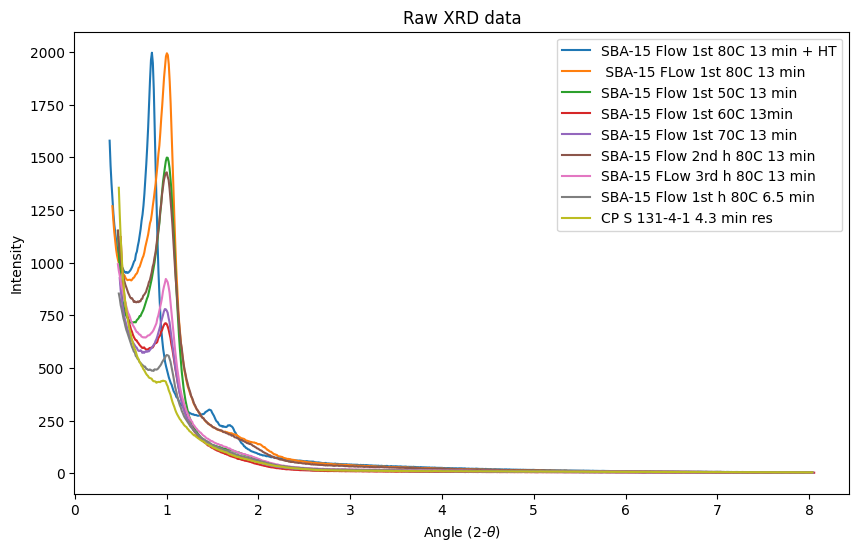

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
for sheet in data.keys():
    ax.plot(data[sheet]['Angle'], data[sheet]['Intensity'], label=sheet)
ax.legend()
ax.set_xlabel(r'Angle (2-$\theta$)')
ax.set_ylabel('Intensity')
ax.set_title('Raw XRD data')
plt.show()


- Performing some min-max normalisation. We want to preserve proportions.

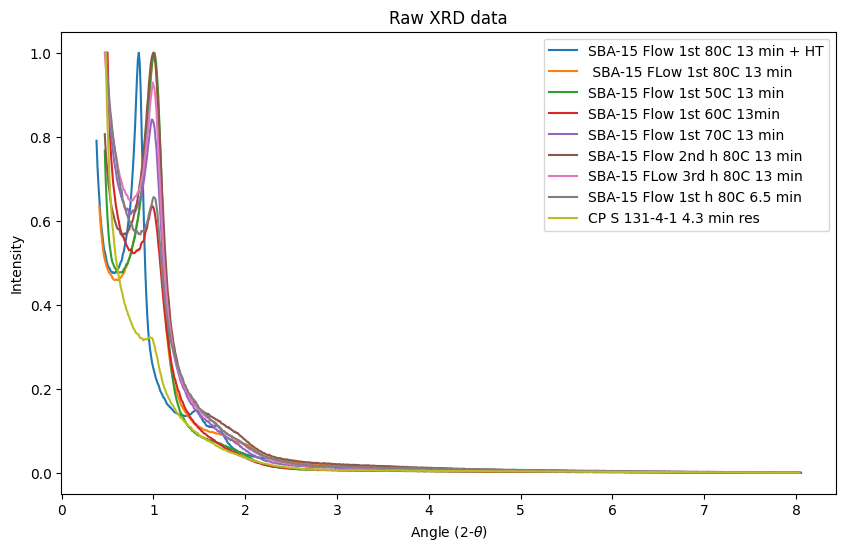

In [7]:
for sheet in data.keys():
    min, max = data[sheet]['Intensity'].min(), data[sheet]['Intensity'].max()
    data[sheet]['Intensity'] = (data[sheet]['Intensity'] - min) / (max - min)


# And plot the normalised data
fig, ax = plt.subplots(figsize=(10, 6))
for sheet in data.keys():
    ax.plot(data[sheet]['Angle'], data[sheet]['Intensity'], label=sheet)
ax.legend()
ax.set_xlabel(r'Angle (2-$\theta$)')
ax.set_ylabel('Intensity')
ax.set_title('Raw XRD data')
plt.show()